In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import ensemble

%matplotlib inline
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [4]:
df.describe(include='object')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


<AxesSubplot:xlabel='income', ylabel='count'>

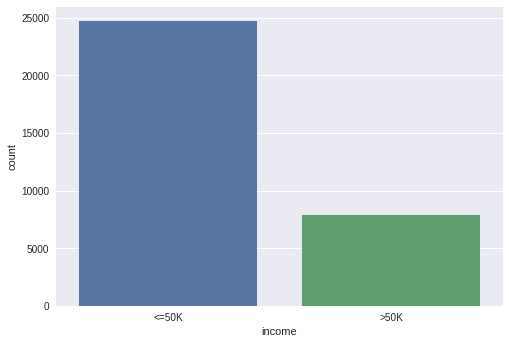

In [5]:
sns.countplot(data=df, x='income')

In [6]:
df['income'] = df['income'].apply(lambda value: 1 if value == '>50K' else 0)

In [7]:
types = df.dtypes
cat_features = list(types[(types == 'object')].index)
cat_features

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

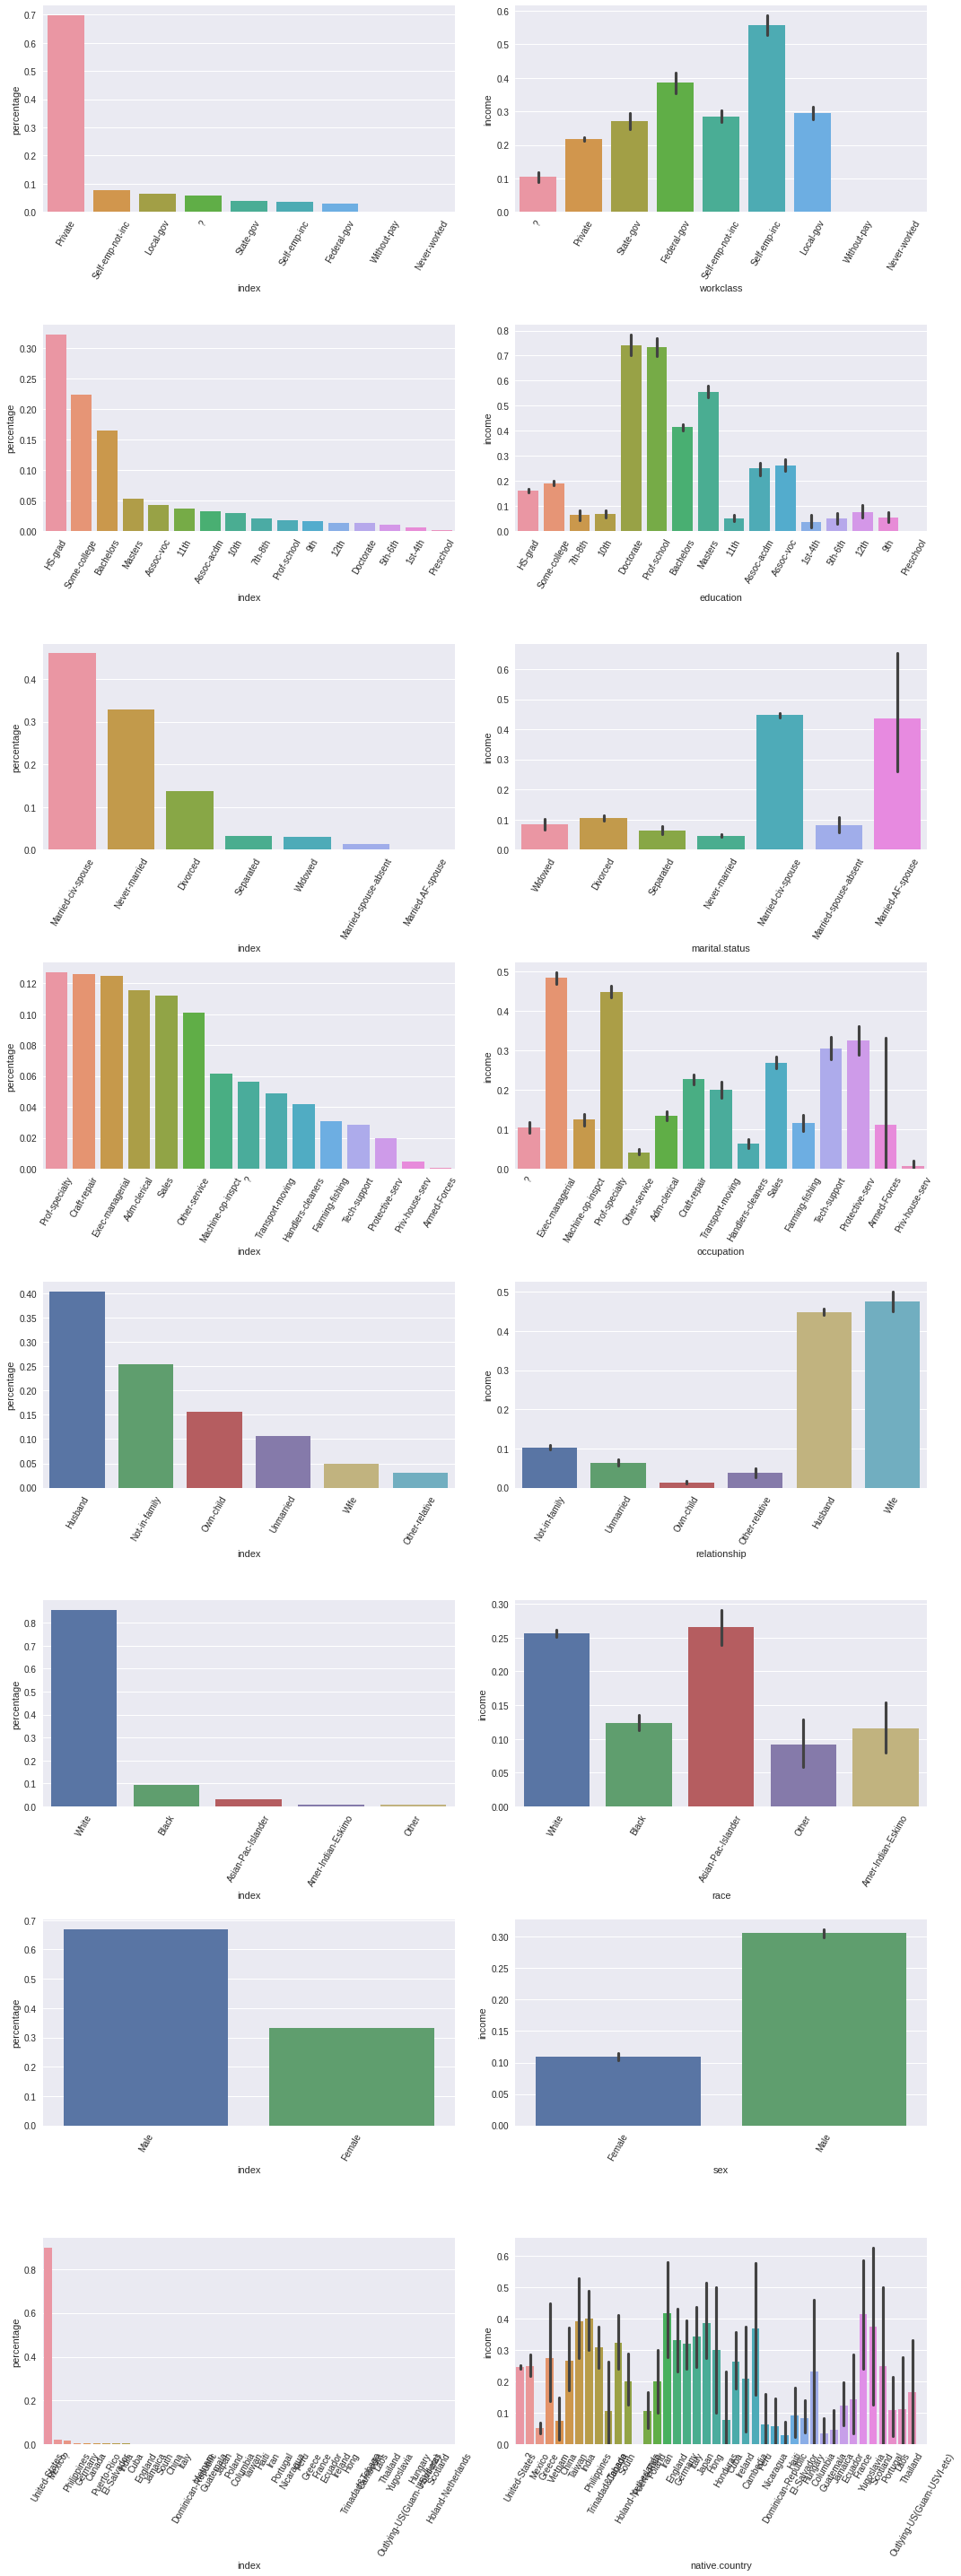

In [8]:
n = len(cat_features)

fig, ax = plt.subplots(n, 2, figsize=(15, 40))

for i, feature in enumerate(cat_features):
    count_data = (df[feature].value_counts(normalize=True)
                            .sort_values(ascending=False)
                            .rename('percentage')
                            .reset_index())
    
    count_barplot = sns.barplot(data=count_data, x='index', y='percentage', ax=ax[i][0])
    count_barplot.xaxis.set_tick_params(rotation=60)
    
    mean_barplot = sns.barplot(data=df, x=feature, y='income', ax=ax[i][1])
    mean_barplot.xaxis.set_tick_params(rotation=60)
    
plt.tight_layout()

In [9]:
ad_df = df.copy()

ad_df['education'] = ad_df['education'].apply(
    lambda x: 'School' if x == '11th' or x == '10th' or x == '12th' or x == '9th' 
    or x == '7th-8th' or x == '5th-6th' or x == '1st-4th' else x 
)

ad_df['education'] = ad_df['education'].apply(
    lambda x: 'Associate' if x == 'Assoc-voc' or x == 'Assoc-acdm' else x
)

ad_df['marital.status'] = ad_df['marital.status'].apply(
    lambda x: 'Prev-Married' if x == 'Divorced' or x == 'Separated' or x == 'Widowed'
    else x
)

ad_df['marital.status'] = ad_df['marital.status'].apply(
    lambda x: 'Married' if x == 'Married-spouse-absent' or x == 'Married-AF-spouse'
    or x == 'Married-civ-spouse' else x
)

ad_df['relationship'] = ad_df['relationship'].apply(
    lambda x: 'In relationship' if x == 'Husband' or x == 'Wife' else 'Not in relationship'
)

ad_df['workclass'] = ad_df['workclass'].apply(
    lambda x: 'No income' if x == 'Never-worked' or x == 'Without-pay' else x
)

ad_df['native.country'] = ad_df['native.country'].apply(
    lambda x: 'Other' if x != 'United-States' else x
)




In [10]:
ad_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [11]:
ad_df['capital.gain'] = np.log(ad_df['capital.gain'] + 1)
ad_df['capital.loss'] = np.log(ad_df['capital.loss'] + 1)
ad_df['fnlwgt'] = np.log(ad_df['fnlwgt'] + 1)

ad_df['capital_diff'] = abs((ad_df['capital.gain'] - ad_df['capital.loss']))

In [12]:
ad_df = ad_df.drop(['education.num', 'capital.gain', 'capital.loss'], axis=1)

In [13]:
ad_df.describe(include='object')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,9,3,15,2,5,2,2
top,Private,HS-grad,Married,Prof-specialty,Not in relationship,White,Male,United-States
freq,22696,10501,15417,4140,17800,27816,21790,29170


<AxesSubplot:>

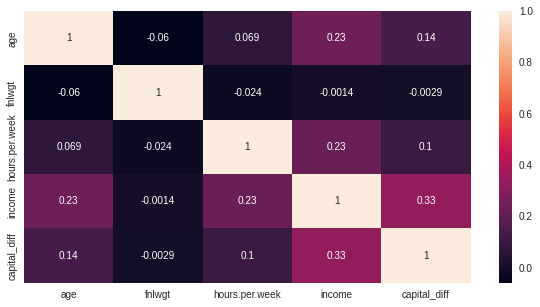

In [14]:
plt.figure(figsize=(10, 5))
sns.heatmap(ad_df.corr(), annot=True)

In [15]:
du_df = pd.get_dummies(ad_df, drop_first=True)
du_df.head()

,age,fnlwgt,hours.per.week,income,capital_diff,workclass_Federal-gov,workclass_Local-gov,workclass_No income,workclass_Private,workclass_Self-emp-inc,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not in relationship,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_United-States
0,90,11.252262,40,0,8.379539,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,82,11.797134,18,0,8.379539,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
2,66,12.133835,40,0,8.379539,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,54,11.851966,40,0,8.268988,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
4,41,12.486216,40,0,8.268988,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [16]:
X = du_df.drop('income', axis=1)
y = du_df['income']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

In [18]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
log_reg = linear_model.LogisticRegression(
    random_state=1,
    solver='sag',
    max_iter=1000
)

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='sag')

In [20]:
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     19775
           1       0.72      0.58      0.64      6273

    accuracy                           0.84     26048
   macro avg       0.80      0.75      0.77     26048
weighted avg       0.84      0.84      0.84     26048

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4945
           1       0.72      0.58      0.64      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.85      0.84      6513



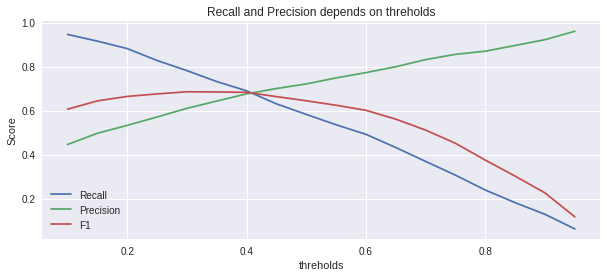

In [21]:
y_test_proba_pred = log_reg.predict_proba(X_test_scaled)[:, 1]
y_test_proba_pred = pd.Series(y_test_proba_pred)

recall_scores = []
precision_scores = []
f1_scores = []

thresholds = np.arange(0.1, 1, 0.05)

for threshold in thresholds:
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))
    
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(thresholds, recall_scores, label='Recall')
ax.plot(thresholds, precision_scores, label='Precision')
ax.plot(thresholds, f1_scores, label='F1')

ax.set_title('Recall and Precision depends on threholds')
ax.set_xlabel('threholds')
ax.set_ylabel('Score')
ax.legend()
    

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn import tree

In [26]:
tree_r = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=8,
    random_state=42,
    min_samples_leaf=10
)

tree_r.fit(X_train, y_train)
y_train_pred = tree_r.predict(X_train)
y_test_pred = tree_r.predict(X_test)

print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     19744
           1       0.79      0.51      0.62      6304

    accuracy                           0.85     26048
   macro avg       0.83      0.73      0.76     26048
weighted avg       0.84      0.85      0.84     26048

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4976
           1       0.76      0.48      0.59      1537

    accuracy                           0.84      6513
   macro avg       0.81      0.72      0.75      6513
weighted avg       0.83      0.84      0.83      6513



In [27]:
from sklearn import ensemble

In [28]:
rt = ensemble.RandomForestClassifier(
    criterion='entropy',
    max_depth=8,
    n_estimators=500,
    min_samples_leaf=10,
    random_state=42
)
rt.fit(X_train, y_train)

y_train_predict = rt.predict(X_train)
y_test_pred = rt.predict(X_test)

print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     19744
           1       0.79      0.51      0.62      6304

    accuracy                           0.85     26048
   macro avg       0.83      0.73      0.76     26048
weighted avg       0.84      0.85      0.84     26048

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4976
           1       0.80      0.50      0.61      1537

    accuracy                           0.85      6513
   macro avg       0.83      0.73      0.76      6513
weighted avg       0.85      0.85      0.84      6513



[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85 0.9  0.95]
[0.5661445555765239, 0.5991027732463295, 0.6220575414123801, 0.644888366627497, 0.6676837020086448, 0.6892289582107122, 0.6709765226267438, 0.6378539493293592, 0.6136, 0.5636126791141989, 0.5016317016317016, 0.3825363825363825, 0.27852348993288595, 0.22209369577790633, 0.15486194477791118, 0.1117936117936118, 0.030749519538757205, 0.0]


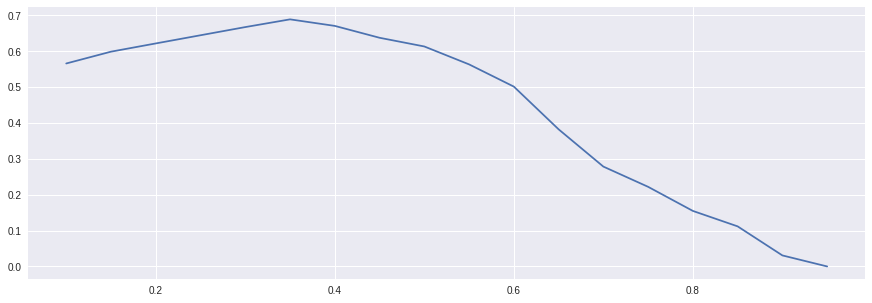

In [36]:
thresholds = np.arange(0.1, 1, 0.05)
y_test_proba = rt.predict_proba(X_test)[:, 1]
y_test_proba = pd.Series(y_test_proba)
f1_scores = []

for threshold in thresholds:
    y_cur = y_test_proba.apply(lambda x: 1 if x> threshold else 0)
    f1_scores.append(metrics.f1_score(y_test, y_cur))    
    
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(thresholds, f1_scores)
print(thresholds)
print(f1_scores)